### Always to run stuff

In [1]:
%cd ../..
%load_ext autoreload
%autoreload 2

/home/amir/rqc_internship/frame_stack


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as jn
import os
import yaml
from tqdm.notebook import tqdm

In [3]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
with open('pathes.yaml') as conf_file:
    path_config = yaml.safe_load(conf_file)

pressure_path = path_config['p_video_path']
signal_path = path_config['s_video_path']


In [4]:
import torch_bimodal_sim_lib as tbsl

In [5]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time 

### Клетка для запуска.

## End of always run stuff.
## Beginning of code.

In [30]:
from simToReal import sim_utils

In [7]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)

In [8]:
config['env']['sen_geometry']['n_angles'] = 1
config['env']['sen_geometry']['distance'] = 0.1
config['env']['phys']['sigma'] = 1
config['env']['bimodal']['borning_modes'] = [1, 0]
config['env']['bimodal']['impact_modes'] = [1, 1]
config['env']['bimodal']['period'] = 2.5

In [9]:
simb = tbsl.FiberSimulator(config)

Выбираю параметры, похожие на реальные с разными силами периодического эффекта

In [40]:
sinus_sim = sim_utils.SinusSimulator(config, tbsl.FiberSimulator)
N = 15
forces = np.linspace(0, 16, N)

sinus_ampl, avg_signal = sinus_sim.generate_charact_curves([[0.5, 0], 
                                                            [0.5, 0.5]], forces)

In [41]:
def plot_curves(sinus_ampl, avg_signal):
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 3, 1)
    plt.plot(forces, sinus_ampl)
    plt.xlabel("force")
    plt.ylabel("sinus amplitude")
    plt.title("Зависимость эффекта от силы")

    plt.subplot(1, 3, 2)
    plt.plot(avg_signal, sinus_ampl)
    plt.xlabel("avg signal")
    plt.ylabel("sinus amplitude")
    plt.title("Зависимость эффекта от сигнала")

    plt.subplot(1, 3, 3)
    plt.plot(forces, avg_signal)
    plt.xlabel("force")
    plt.ylabel("avg signal")
    plt.title("Зависимость сигнала от силы")

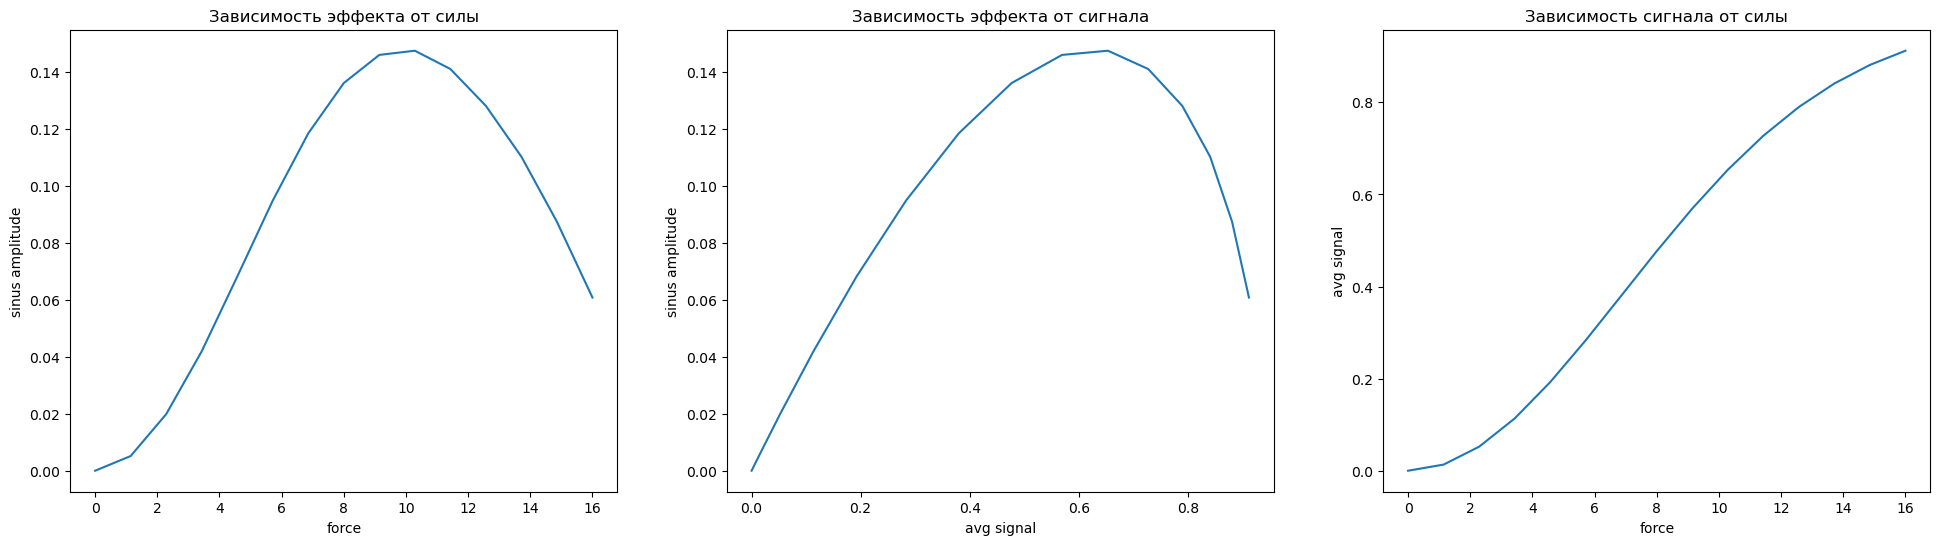

In [42]:
matrix = [[1, 0],
          [1, 1]]
plot_curves(*sinus_sim.generate_charact_curves(matrix, forces))

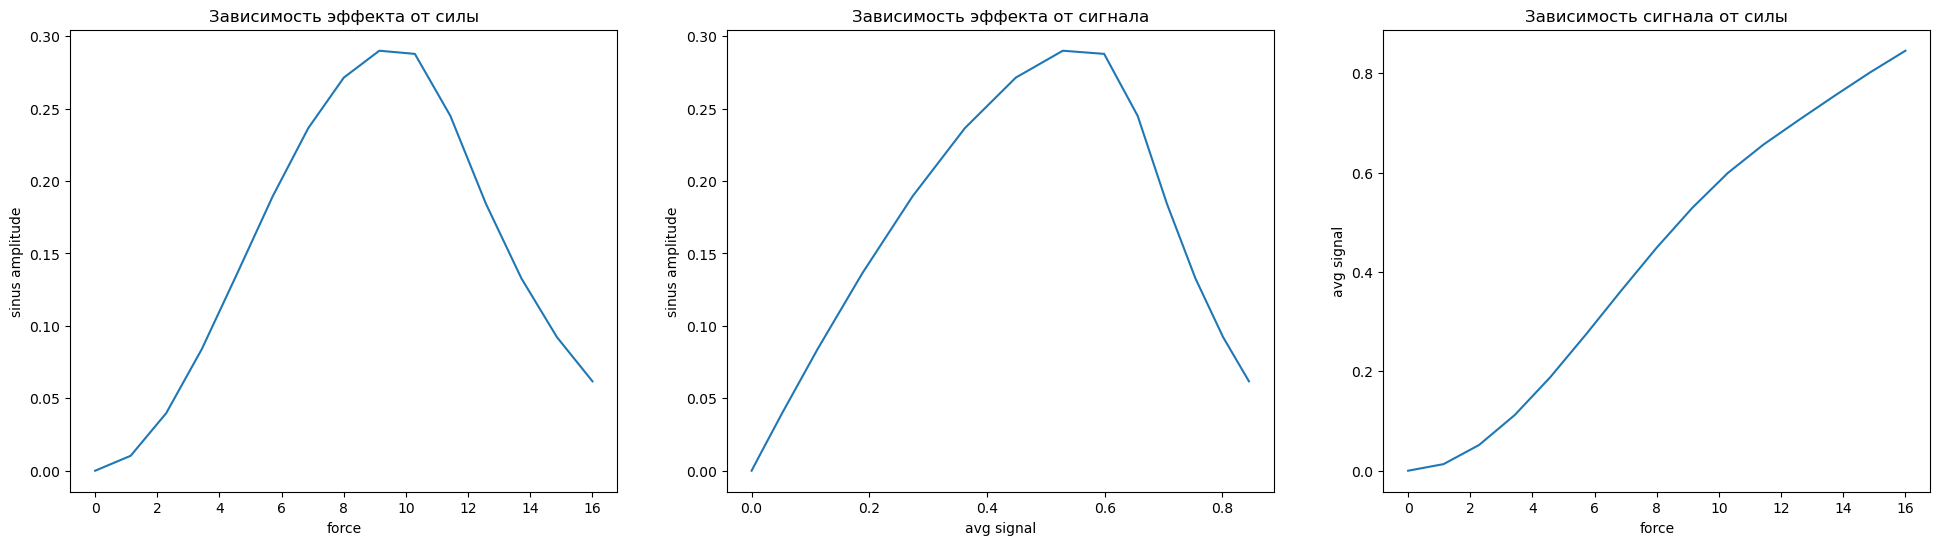

In [43]:
matrix = [[1, 0],
          [2, 1]]
plot_curves(*sinus_sim.generate_charact_curves(matrix, forces))

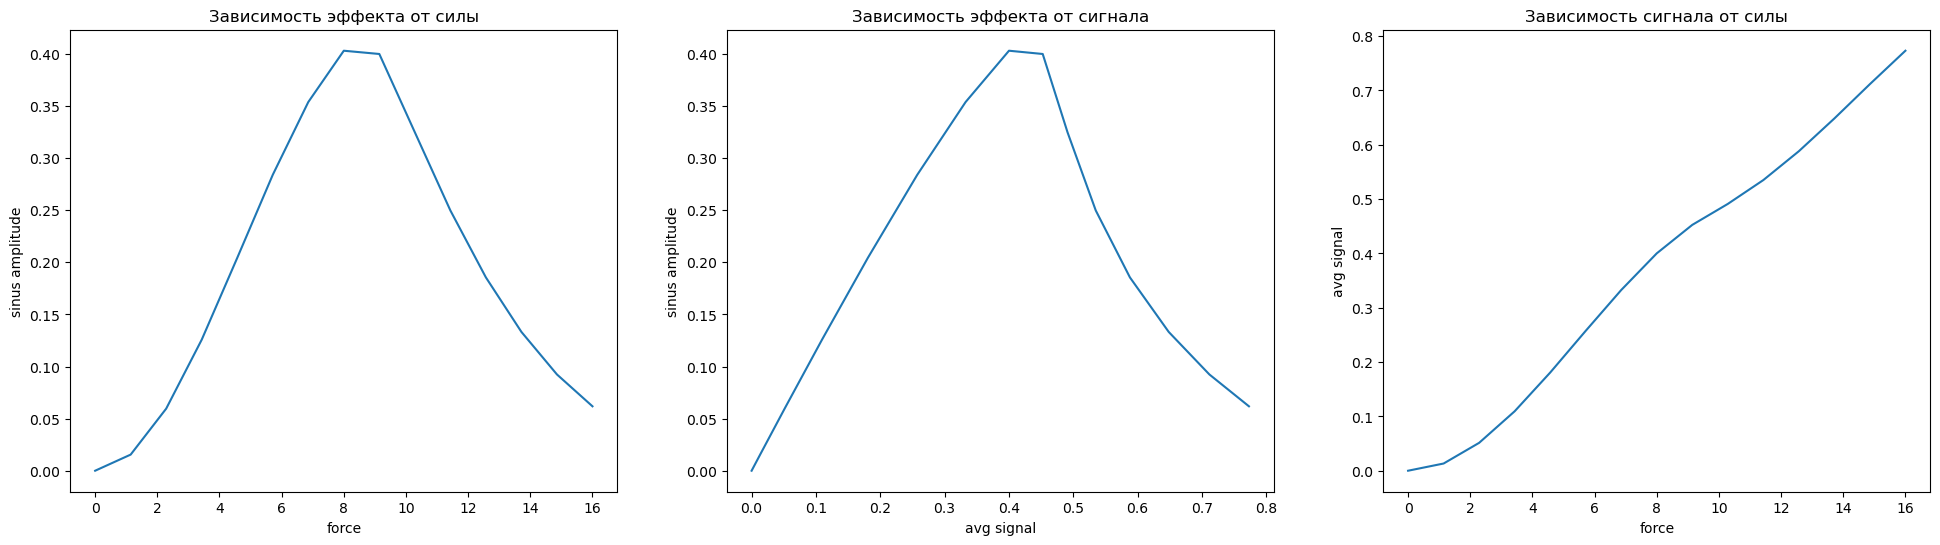

In [44]:
matrix = [[1, 0],
          [3, 1]]
plot_curves(*sinus_sim.generate_charact_curves(matrix, forces))

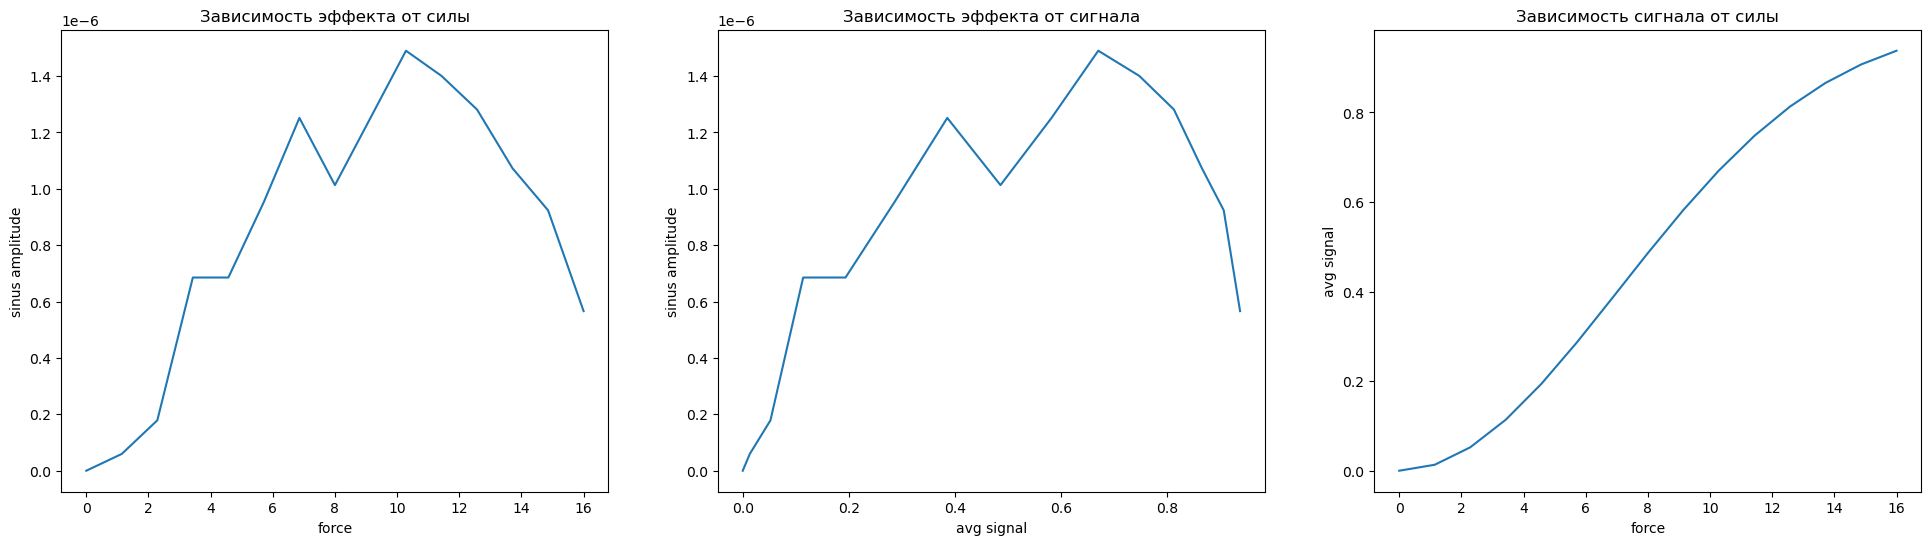

In [45]:
matrix = [[1, 0],
          [0, 1]]
plot_curves(*sinus_sim.generate_charact_curves(matrix, forces))

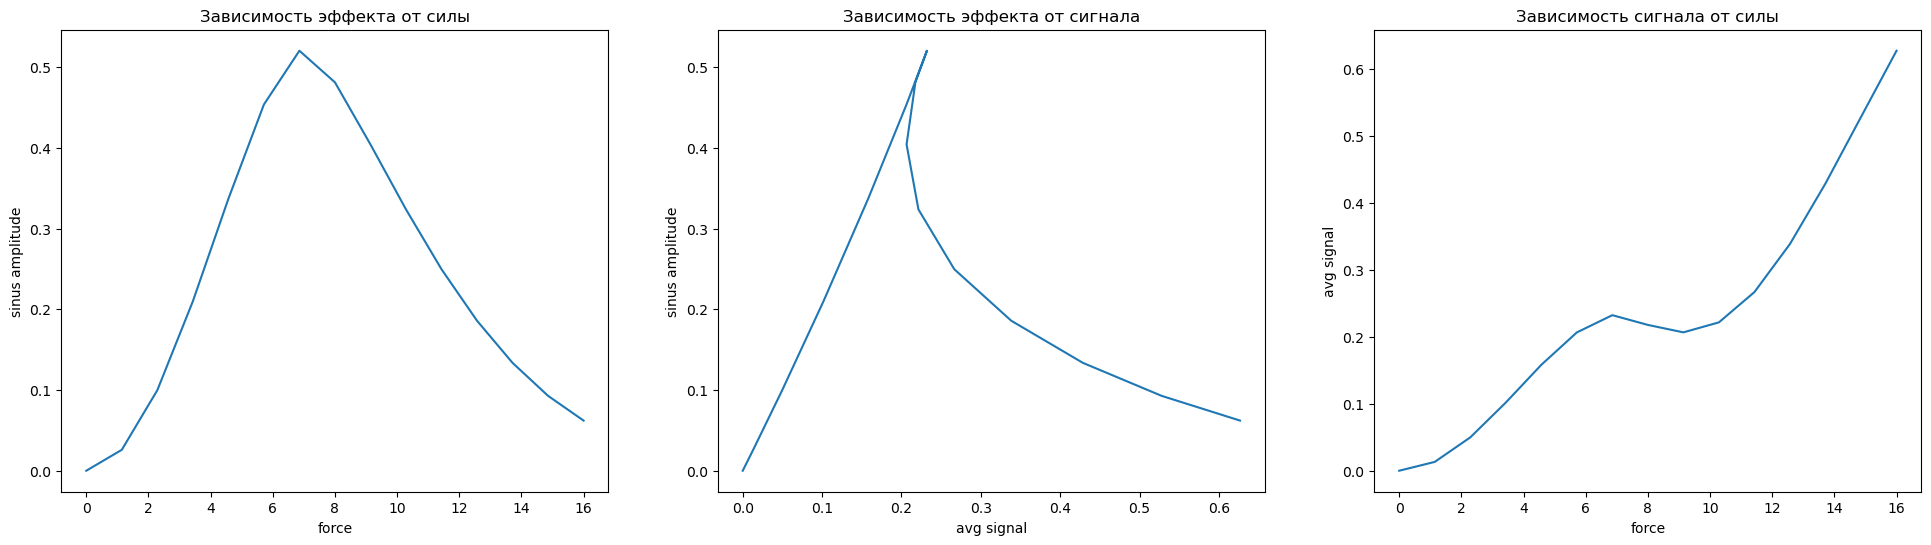

In [55]:
matrix = [[1, 0],
          [5, 1]]
plot_curves(*sinus_sim.generate_charact_curves(matrix, forces, use_simple=False))

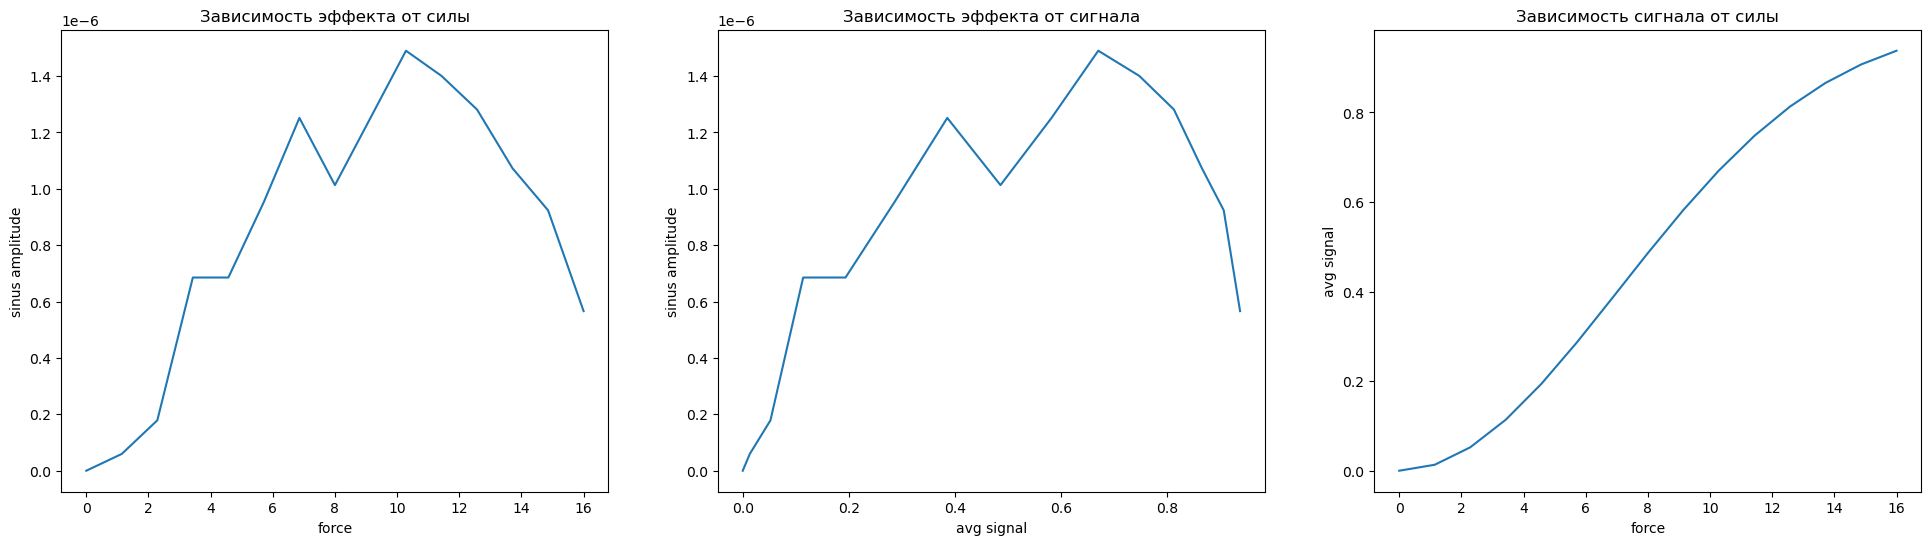

In [ ]:
matrix = [[1, 0],
          [5, 1]]
plot_curves(*sinus_sim.generate_charact_curves(matrix, forces))

В итоге:
[[1, 0], [x, 1]]

отсутствие периодического эффекта -- 0

1 --  как в старых сенсорах,

3 -- как в новых

2 -- что-то посередине. Такое тоже бывало.
